In [6]:
import import_src
from pybroker.order_broker import Broker
from pybroker.broker_vis import *
from pybroker.models import *
from pybroker.agents import *
import numpy as np
import random
import pandas as pd

In [7]:
# Create a broker, and a market for ACME stock
asset = "ACME"
broker = Broker()
broker.create_market(asset)

In [8]:
# traderId - Agent mapping
all_agents: dict[int, Agent] = {
    1: Arbitrage(),
    2: Arbitrage(),
    3: RevertToMean(),
    4: RevertToMean(),
}
num_random_monkeys: int = 30
for i in range(num_random_monkeys):
    traderId: int = 100 + i
    all_agents[traderId] = RandomMonkey(
        mean_bid=100,
        bid_std=25,
        mean_ask=100,
        ask_std=25,
        order_size_k=3,
    )

starting_cash: int = 100000
starting_assets: int = 1000

for traderId, agent in all_agents.items():
    broker.open_account(traderId)
    broker.deposit_cash(traderId, starting_cash)
    broker.deposit_asset(traderId, starting_assets, asset)

num_iterations: int = 5000

In [ ]:
for i in range(num_iterations):
    for traderId, agent in all_agents.items():
        observations:Observations = observe(broker, traderId, asset)
        actions = agent.policy(observations)
        for order in actions.orders:
            try:
                broker.place_order(asset, order)
            except Exception as e:
                pass  # Invalid order; skip

    if i % 100 == 0:
        broker.end_trading_day()

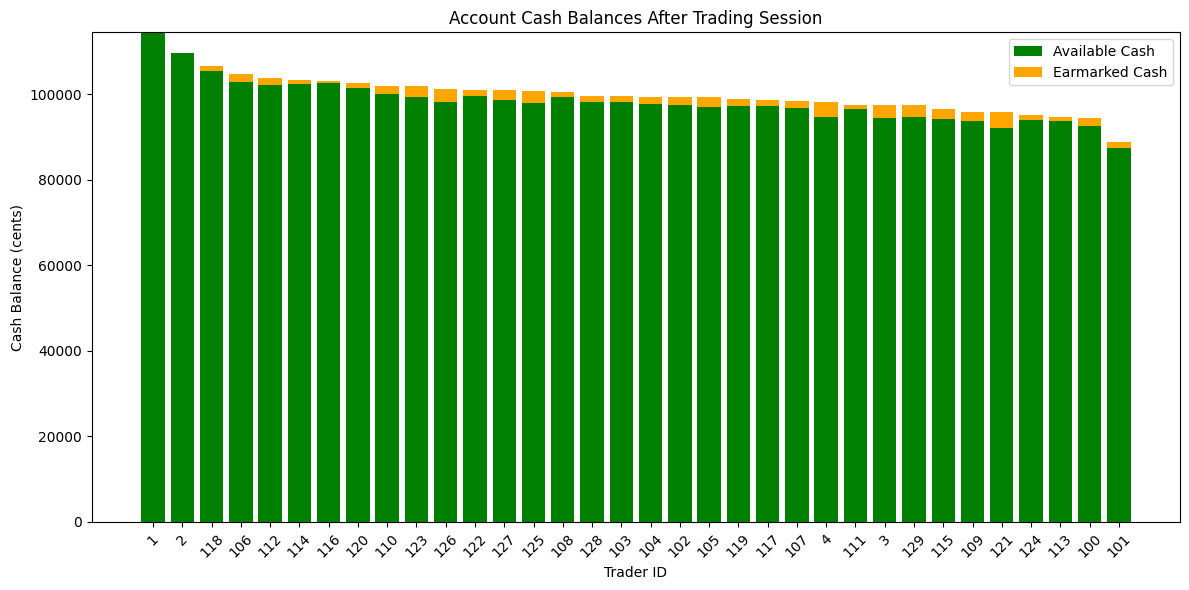

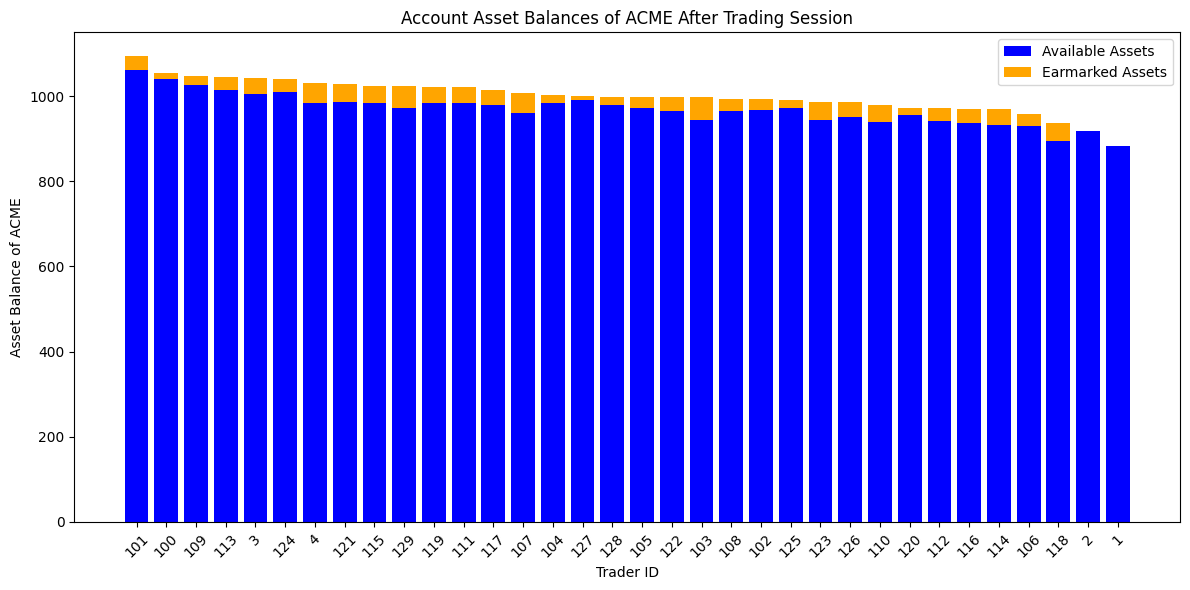

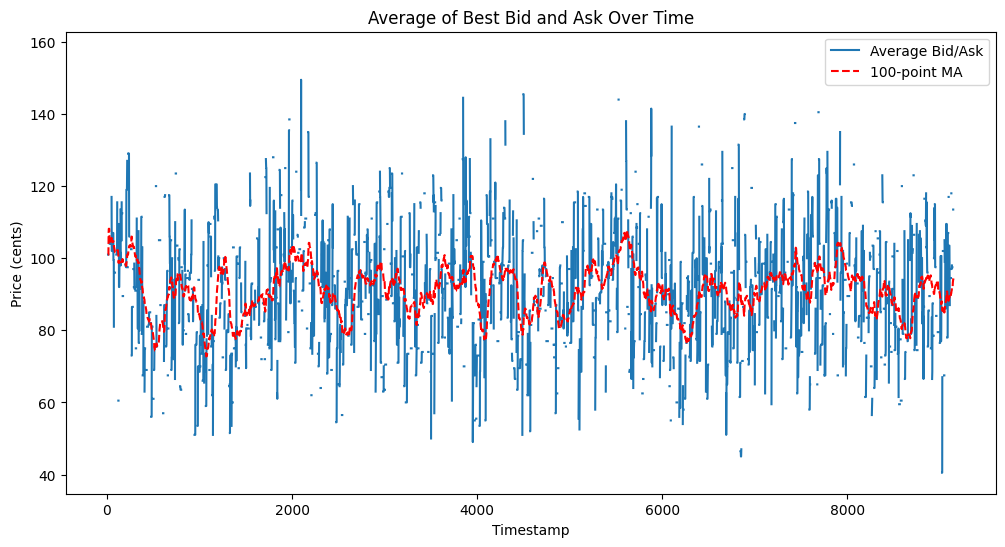

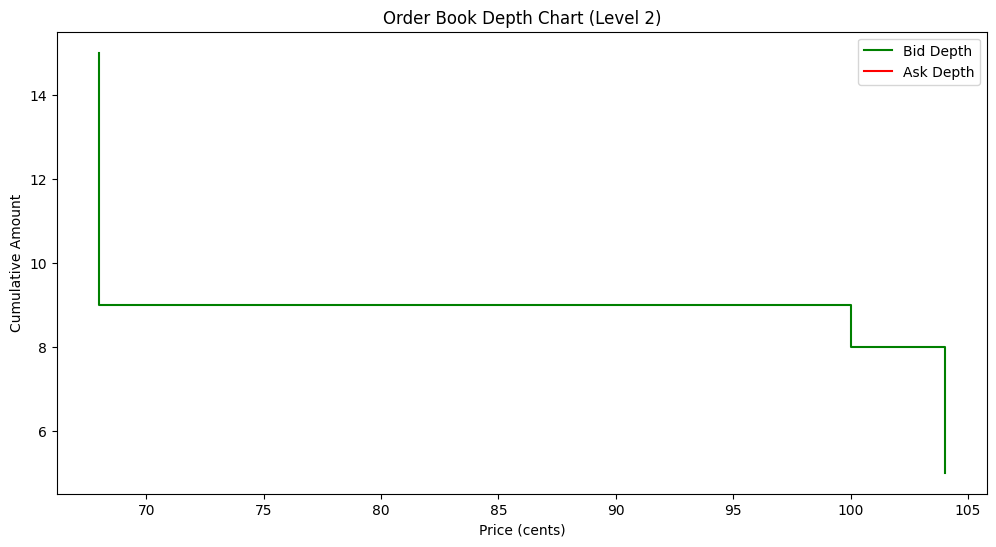

In [ ]:
show_account_cash_balances(broker)
show_account_asset_balances(broker, asset)
average_bid_ask_spread_over_time(broker, asset)
depth_chart(broker, asset)